#### Pegando os dados e analisando

In [57]:
import pandas as pd


bitcoin = pd.read_csv('./data/BTC-USD.csv')
bitcoin = bitcoin.iloc[2:,:]
bitcoin

,Price,Close,High,Low,Open,Volume
2,2014-09-17,457.3340148925781,468.17401123046875,452.4219970703125,465.864013671875,21056800
3,2014-09-18,424.44000244140625,456.8599853515625,413.10400390625,456.8599853515625,34483200
4,2014-09-19,394.7959899902344,427.8349914550781,384.5320129394531,424.1029968261719,37919700
5,2014-09-20,408.90399169921875,423.2959899902344,389.88299560546875,394.6730041503906,36863600
6,2014-09-21,398.8210144042969,412.4259948730469,393.1809997558594,408.0849914550781,26580100
...,...,...,...,...,...,...
3908,2025-05-28,107802.328125,109298.2890625,106812.9296875,108992.171875,49155377493
3909,2025-05-29,105641.7578125,108910.046875,105374.3984375,107795.5703125,56022752042
3910,2025-05-30,103998.5703125,106308.9453125,103685.7890625,105646.2109375,57655287183
3911,2025-05-31,104638.09375,104927.1015625,103136.1171875,103994.71875,38997843858


In [58]:
bitcoin.dtypes

Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [59]:
cols = ['Close', 'High', 'Low', 'Open', 'Volume']
bitcoin[cols] = bitcoin[cols].apply(pd.to_numeric, errors='coerce')

In [60]:
bitcoin.dtypes

Price      object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [61]:
bitcoin.head(15)

,Price,Close,High,Low,Open,Volume
2,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
3,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
4,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
5,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
6,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100
7,2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600
8,2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500
9,2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700
10,2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400
11,2014-09-26,404.424988,414.937988,400.009003,411.428986,21460800


In [62]:
bitcoin.isnull().sum()

Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [63]:
bitcoin.isna().sum()

Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [64]:
# Calculando a media para todos os atributos
bitcoin.mean(numeric_only=True)

Close     2.248517e+04
High      2.294980e+04
Low       2.194747e+04
Open      2.245971e+04
Volume    1.954026e+10
dtype: float64

In [65]:
# Calculando a mediana para todos os atributos
bitcoin.median(numeric_only=True)

Close     9.813070e+03
High      1.002381e+04
Low       9.591024e+03
Open      9.800216e+03
Volume    1.573717e+10
dtype: float64

In [66]:
# Calculando percentil 15% para todos os atributos
bitcoin.quantile(0.15,numeric_only=True)

Close     4.502930e+02
High      4.554855e+02
Low       4.442405e+02
Open      4.503715e+02
Volume    6.519480e+07
Name: 0.15, dtype: float64

In [67]:
# Calculando o intervalo para todos os atributos
bitcoin.max(numeric_only=True) - bitcoin.min(numeric_only=True)

Close     1.114952e+05
High      1.117584e+05
Low       1.091136e+05
Open      1.115025e+05
Volume    3.509620e+11
dtype: float64

In [68]:
# Calculando a variância para todos os atributos
bitcoin.var(numeric_only=True)

Close     6.813644e+08
High      7.077955e+08
Low       6.513698e+08
Open      6.798327e+08
Volume    4.384253e+20
dtype: float64

In [69]:
# Calculando o desvio-padrão para todos os atributos
bitcoin.std(numeric_only=True)

Close     2.610296e+04
High      2.660443e+04
Low       2.552195e+04
Open      2.607360e+04
Volume    2.093861e+10
dtype: float64

In [70]:
# Calculando a correlação
bitcoin.corr(numeric_only=True)

,Close,High,Low,Open,Volume
Close,1.000000,0.999666,0.999577,0.999215,0.660181
High,0.999666,1.000000,0.999336,0.999627,0.666574
Low,0.999577,0.999336,1.000000,0.999473,0.651302
Open,0.999215,0.999627,0.999473,1.000000,0.660352
Volume,0.660181,0.666574,0.651302,0.660352,1.000000


<Axes: >

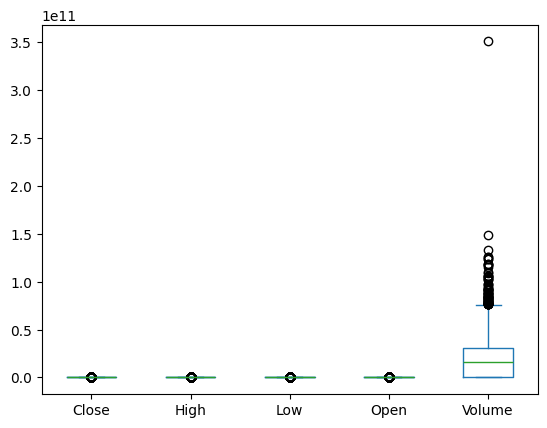

In [71]:
import matplotlib.pyplot as plt
bitcoin.plot(kind='box')

In [74]:
bitcoin.describe()

,Close,High,Low,Open,Volume
count,3911.000000,3911.000000,3911.000000,3911.000000,3.911000e+03
mean,22485.174850,22949.801696,21947.466082,22459.705025,1.954026e+10
std,26102.957464,26604.426509,25521.947573,26073.600856,2.093861e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2018.864990,2101.905029,1911.434998,1988.109985,8.604240e+08
50%,9813.070312,10023.807617,9591.024414,9800.215820,1.573717e+10
75%,36669.626953,37579.658203,35271.583984,36648.519531,3.082710e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


#### Tratando dados

In [75]:
bitcoin[bitcoin.duplicated() == True]

,Price,Close,High,Low,Open,Volume
